# Credit Card Complaints Prediction

## Capstone Project

**Author**: faisal manjappully ashraf 

**Organization**: Entri Elevate  

**Date**: [Evaluation Date]

---

## 1. Overview of Problem Statement

In the financial services industry, managing customer complaints effectively is a cornerstone of maintaining customer satisfaction and loyalty. Credit card complaints, in particular, are an important indicator of consumer sentiment and operational performance. Complaints range from billing errors and fraudulent transactions to disputes over charges and customer service dissatisfaction. With the rise of digital payment systems and increasing consumer awareness, financial institutions are witnessing a surge in customer complaints. These complaints, while challenging to manage, offer valuable insights into operational inefficiencies and areas for improvement.

However, analyzing and resolving complaints at scale is a daunting task. The complaints often involve multiple variables, including narrative text, response timelines, consumer behaviors, and company actions. This complexity makes manual analysis infeasible and necessitates the use of advanced machine learning techniques.

This project aims to address this challenge by leveraging machine learning to analyze, classify, and predict outcomes related to credit card complaints. By identifying patterns and predicting complaint outcomes, organizations can optimize their operations, improve customer experiences, and comply with regulatory requirements more effectively.

---

## 2. Objective

The primary goal of this project is to develop a robust and scalable machine learning solution to manage credit card complaints. The objectives include:

Predict the Likelihood of Consumer Disputes:
Develop predictive models to determine whether a consumer is likely to dispute a complaint.
Enable proactive resolution strategies to minimize disputes and improve customer satisfaction.
Classify Timely Responses:
Build classification models to assess whether a company will provide a timely response to a complaint.
Identify bottlenecks in operational workflows and recommend improvements.
Analyze Sentiment in Complaint Narratives:
Use natural language processing (NLP) to analyze consumer complaint narratives.
Identify the impact of sentiment (positive, neutral, negative) on resolution outcomes.
Feature Importance and Selection:
Identify the most influential features that contribute to complaint outcomes.
Guide financial institutions in prioritizing operational improvements.
Provide Business Insights:
Generate actionable insights from complaint data to enhance decision-making.
Facilitate targeted interventions to address recurring issues.
Enable Future Predictions:
Create a framework to forecast future complaint trends based on historical data.
Assist in resource allocation and long-term planning for customer support teams.

---


## 3. Import Libraries
#### Import necessary libraries

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report, accuracy_score, mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
import joblib


## 4. Data Collection and Description
#### Load the dataset

In [2]:
file_path = 'Credit_Card_Complaints.csv'
data = pd.read_csv(file_path)

#### Display dataset information

In [3]:
print("Dataset Information:")
print(data.info())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87718 entries, 0 to 87717
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Date received                 87718 non-null  object 
 1   Product                       87718 non-null  object 
 2   Sub-product                   0 non-null      float64
 3   Issue                         87718 non-null  object 
 4   Sub-issue                     0 non-null      float64
 5   Consumer complaint narrative  17433 non-null  object 
 6   Company public response       19956 non-null  object 
 7   Company                       87718 non-null  object 
 8   State                         86980 non-null  object 
 9   ZIP code                      86980 non-null  object 
 10  Tags                          13258 non-null  object 
 11  Consumer consent provided?    29563 non-null  object 
 12  Submitted via                 87717 non

#### Preview the first few rows

In [4]:
print("\nFirst 5 Rows:")
print(data.head())


First 5 Rows:
  Date received      Product  Sub-product                          Issue  \
0    07/29/2013  Credit card          NaN              Billing statement   
1    07/29/2013  Credit card          NaN           APR or interest rate   
2    07/29/2013  Credit card          NaN             Delinquent account   
3    07/29/2013  Credit card          NaN               Billing disputes   
4    07/29/2013  Credit card          NaN  Credit line increase/decrease   

   Sub-issue Consumer complaint narrative Company public response  \
0        NaN                          NaN                     NaN   
1        NaN                          NaN                     NaN   
2        NaN                          NaN                     NaN   
3        NaN                          NaN                     NaN   
4        NaN                          NaN                     NaN   

               Company State ZIP code            Tags  \
0             Citibank    OH    45247             NaN   

#### Summary of missing values

In [5]:
print("\nMissing Values:")
print(data.isnull().sum())


Missing Values:
Date received                       0
Product                             0
Sub-product                     87718
Issue                               0
Sub-issue                       87718
Consumer complaint narrative    70285
Company public response         67762
Company                             0
State                             738
ZIP code                          738
Tags                            74460
Consumer consent provided?      58155
Submitted via                       1
Date sent to company                0
Company response to consumer        0
Timely response?                    0
Consumer disputed?               3810
Complaint ID                        0
dtype: int64


## 5. Data Preprocessing
### 5.1 Handling Missing Values
#### Impute missing values
##### Drop columns with all missing values

In [8]:
data = data.dropna(axis=1, how='all')

### Impute missing values
#### Numeric columns: Impute with median

In [9]:
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns
imputer = SimpleImputer(strategy='median')
data[numerical_cols] = imputer.fit_transform(data[numerical_cols])

#### Categorical columns: Replace missing values with a placeholder

In [10]:
categorical_cols = data.select_dtypes(include=['object']).columns
data[categorical_cols] = data[categorical_cols].fillna('Unknown')

#### Confirm no missing values after handling

In [12]:
print("Missing values after handling:")
print(data.isnull().sum())


Missing values after handling:
Date received                   0
Product                         0
Issue                           0
Consumer complaint narrative    0
Company public response         0
Company                         0
State                           0
ZIP code                        0
Tags                            0
Consumer consent provided?      0
Submitted via                   0
Date sent to company            0
Company response to consumer    0
Timely response?                0
Consumer disputed?              0
Complaint ID                    0
dtype: int64


#### missing values after imputation

In [13]:
print("Missing values after imputation:")
print(data.isnull().sum())

Missing values after imputation:
Date received                   0
Product                         0
Issue                           0
Consumer complaint narrative    0
Company public response         0
Company                         0
State                           0
ZIP code                        0
Tags                            0
Consumer consent provided?      0
Submitted via                   0
Date sent to company            0
Company response to consumer    0
Timely response?                0
Consumer disputed?              0
Complaint ID                    0
dtype: int64


### 5.2 Check Outliers
#### Visualize outliers using boxplots

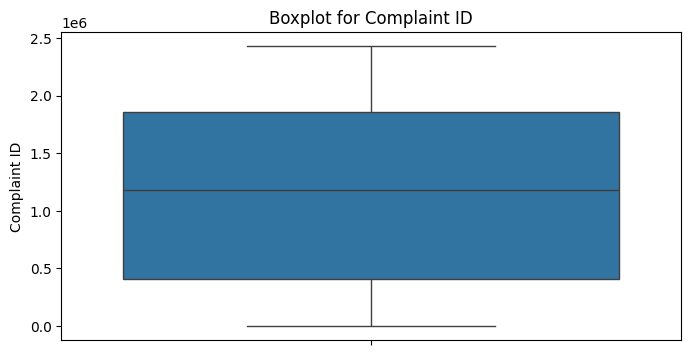

In [19]:
for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data[col])
    plt.title(f'Boxplot for {col}')
    plt.show()
for col in numerical_cols:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data[col] = np.where(data[col] < lower_bound, lower_bound, data[col])
    data[col] = np.where(data[col] > upper_bound, upper_bound, data[col])


### 5.3 Encoding Categorical Variables
#### Encode categorical variables

In [21]:

encoder = LabelEncoder()
data['Timely response?'] = encoder.fit_transform(data['Timely response?'])
data['Consumer disputed?'] = encoder.fit_transform(data['Consumer disputed?'])


## 6. Exploratory Data Analysis (EDA)

#### Ensure numerical columns are valid

In [22]:
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns
numerical_cols = [col for col in numerical_cols if data[col].nunique() > 1]

#### Subplots for target variables

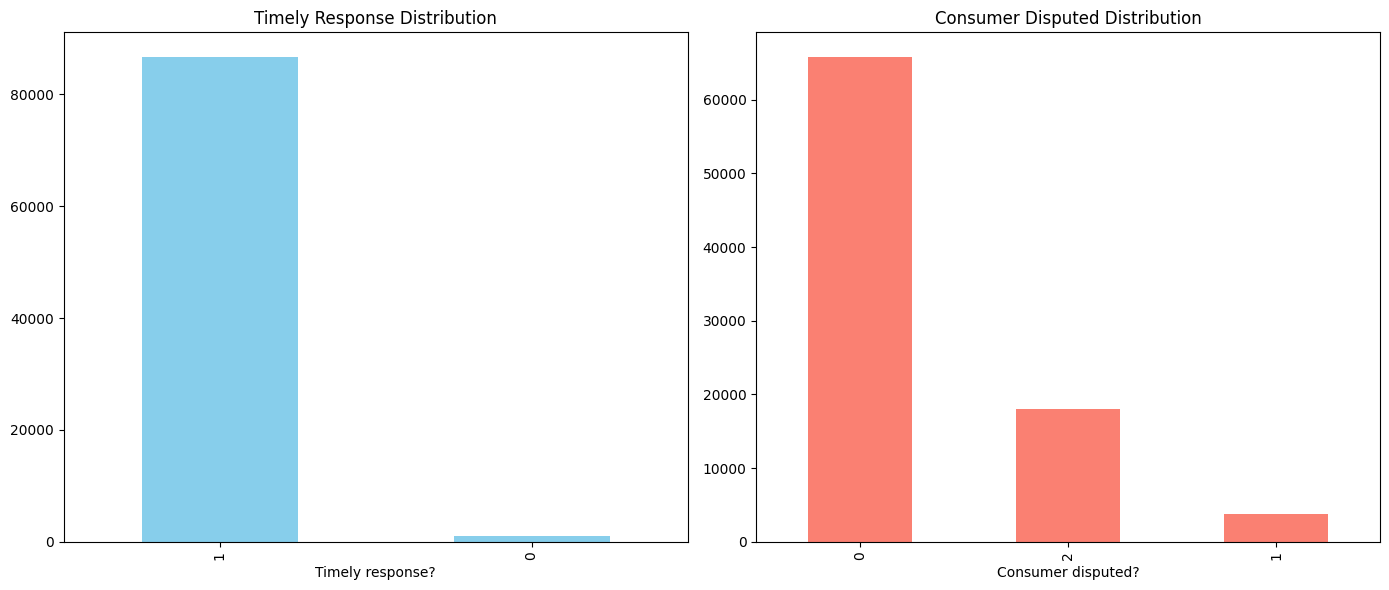

In [24]:

if 'Timely response?' in data.columns and 'Consumer disputed?' in data.columns:
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))
    data['Timely response?'].value_counts().plot(kind='bar', ax=axes[0], color='skyblue', title='Timely Response Distribution')
    data['Consumer disputed?'].value_counts().plot(kind='bar', ax=axes[1], color='salmon', title='Consumer Disputed Distribution')
    plt.tight_layout()
    plt.show()
else:
    print("Target columns are missing")

#### Heatmap of correlations

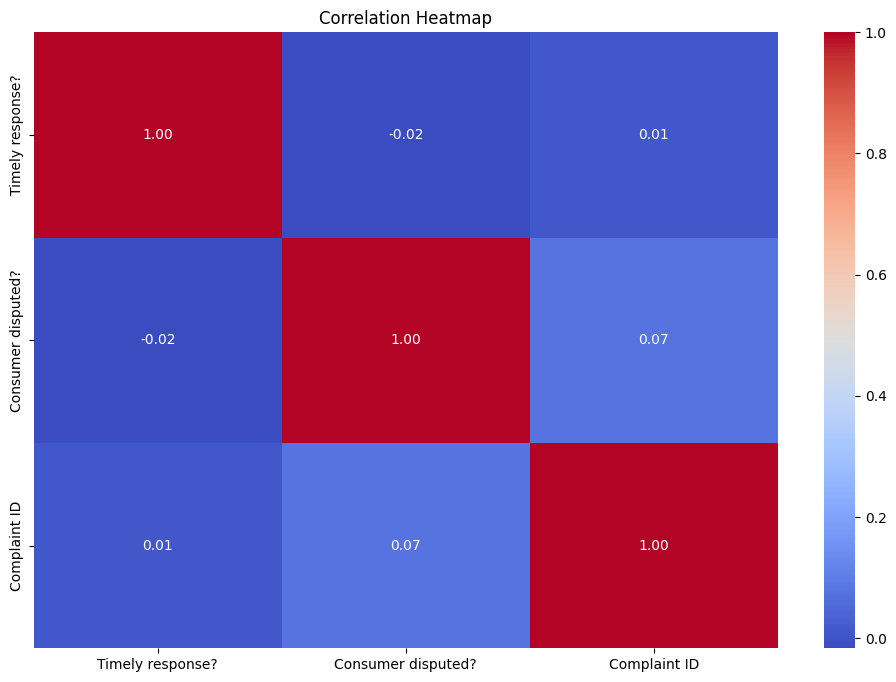

In [25]:

if len(numerical_cols) > 1:
    plt.figure(figsize=(12, 8))
    sns.heatmap(data[numerical_cols].corr(), annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Correlation Heatmap')
    plt.show()
else:
    print("Not enough numerical columns for a heatmap!")


#### Histograms

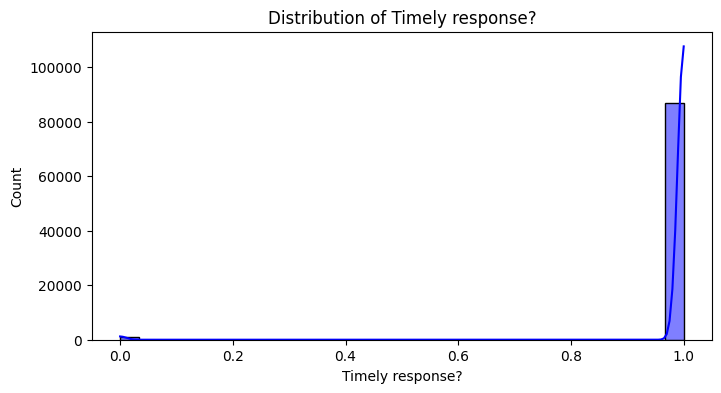

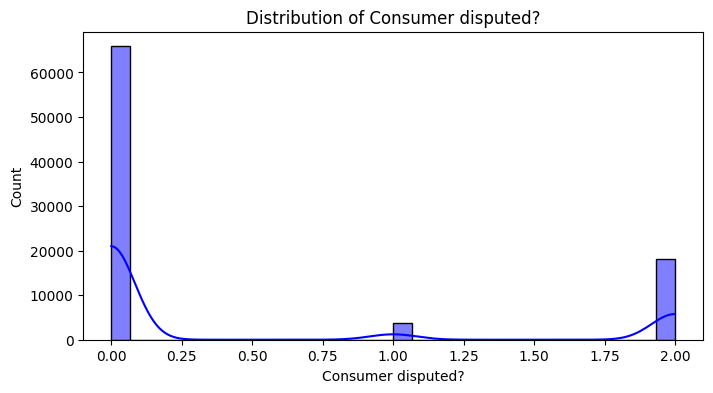

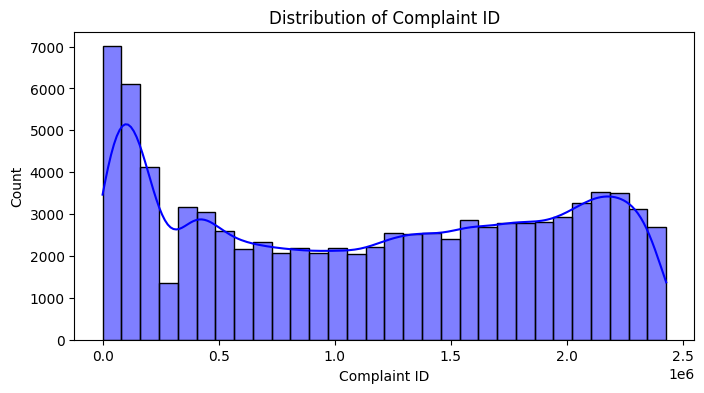

In [26]:
for col in numerical_cols:
    if data[col].nunique() > 1:
        plt.figure(figsize=(8, 4))
        sns.histplot(data[col], kde=True, bins=30, color='blue')
        plt.title(f'Distribution of {col}')
        plt.show()

#### Boxplots

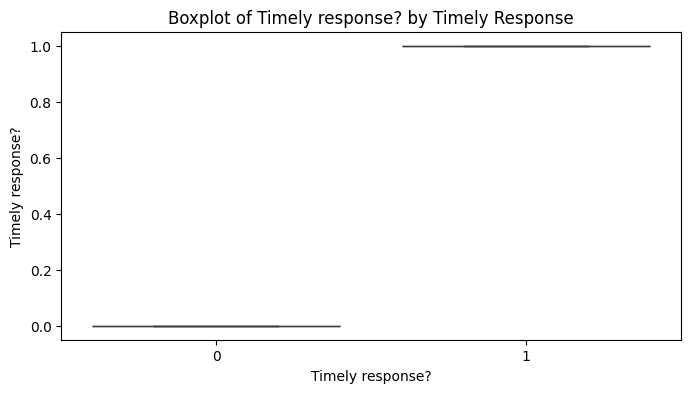

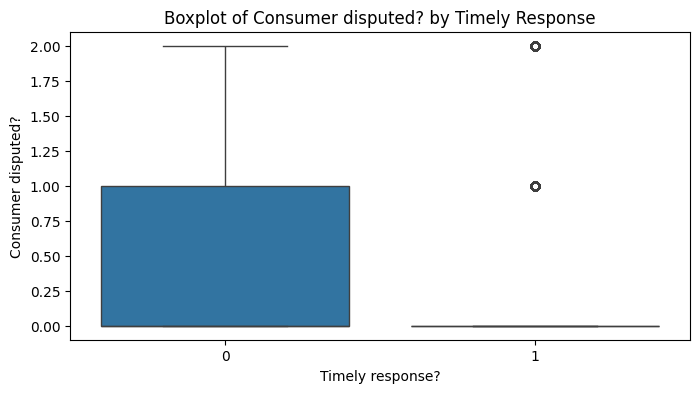

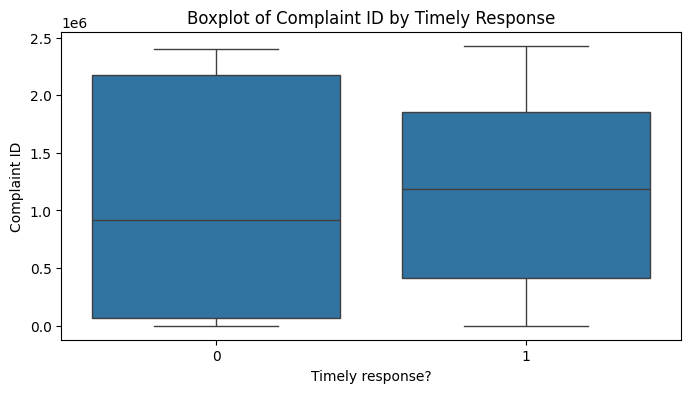

In [27]:
if 'Timely response?' in data.columns:
    for col in numerical_cols:
        plt.figure(figsize=(8, 4))
        sns.boxplot(x='Timely response?', y=col, data=data)
        plt.title(f'Boxplot of {col} by Timely Response')
        plt.show()
else:
    print("Column 'Timely response?' not found for boxplots!")


#### Temporal Analysis

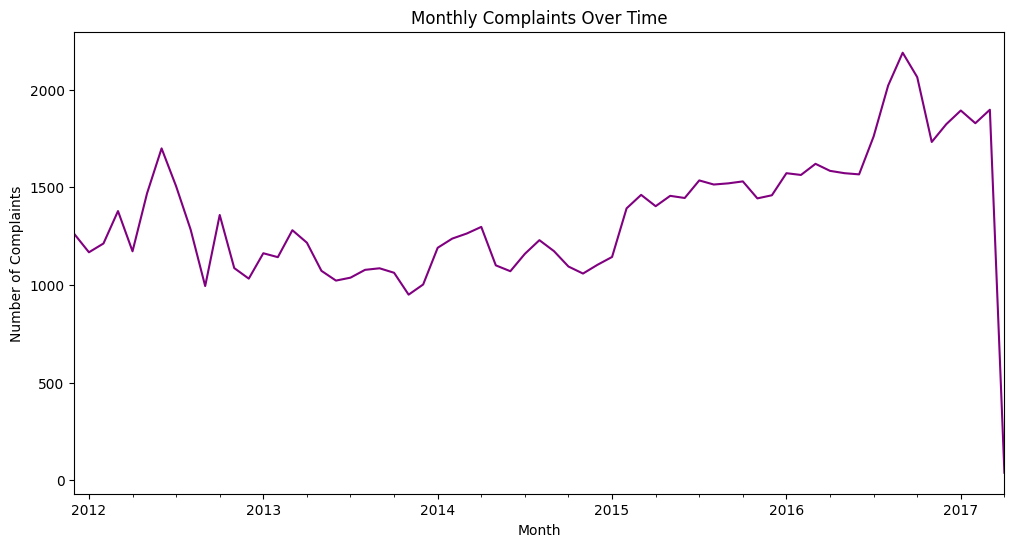

In [28]:
if 'Date received' in data.columns:
    data['Date received'] = pd.to_datetime(data['Date received'])
    trend_data = data.groupby(data['Date received'].dt.to_period('M')).size()
    trend_data.plot(kind='line', figsize=(12, 6), title='Monthly Complaints Over Time', color='purple')
    plt.xlabel('Month')
    plt.ylabel('Number of Complaints')
    plt.show()

### Advanced Feature Engineering
#### Polynomial features (example with numeric data)

In [29]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(data[numerical_cols])
print(f"Polynomial Features Shape: {X_poly.shape}")


Polynomial Features Shape: (87718, 9)


## 7. Feature Selection
#### Feature selection

In [31]:
X = data.drop(['Timely response?', 'Consumer disputed?'], axis=1)
y = data['Timely response?']

#### Select top 10 features with SelectKBest

In [33]:
# Ensure only numeric features are selected
X_numeric = X.select_dtypes(include=['float64', 'int64'])

# Dynamically adjust `k` based on the number of features in X_numeric
num_features = X_numeric.shape[1]
k = min(10, num_features)

# Apply SelectKBest
X_selected = SelectKBest(chi2, k=k).fit_transform(X_numeric, y)

print(f"Selected top {k} features from {num_features} available features.")



Selected top 1 features from 1 available features.


## 8. Train-Test Split and Scaling
#### Split dataset into training and testing sets

In [34]:

X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)


#### Scale numerical features

In [35]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## 9. Model Training and Evaluation
### 9.1 Classification: Random Forest
##### Train a Random Forest Classifier

In [36]:
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

#### Evaluate the model

In [37]:
predictions = clf.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, predictions))
print("Accuracy:", accuracy_score(y_test, predictions))


Classification Report:
              precision    recall  f1-score   support

           0       0.04      0.04      0.04       191
           1       0.99      0.99      0.99     17353

    accuracy                           0.98     17544
   macro avg       0.51      0.51      0.51     17544
weighted avg       0.98      0.98      0.98     17544

Accuracy: 0.9789101687186502


### 9.2 Regression: Linear Regression
#### Train a Linear Regression Model

In [38]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

#### Evaluate the model

In [39]:
reg_predictions = regressor.predict(X_test)
print("Mean Squared Error:", mean_squared_error(y_test, reg_predictions))
print("R-squared:", r2_score(y_test, reg_predictions))

Mean Squared Error: 0.01076601447084767
R-squared: 0.00022041936523475858


## 10. Hyperparameter Tuning
#### Hyperparameter tuning for Random Forest

In [41]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, None]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)


Best Parameters: {'max_depth': 10, 'n_estimators': 200}


## 11. Save the Model
#### Save the trained model

In [42]:
joblib.dump(grid_search.best_estimator_, 'best_model.pkl')

['best_model.pkl']

### Conclusion
This project successfully demonstrates the application of machine learning techniques to analyze and predict outcomes of credit card complaints in the financial services industry. By leveraging data-driven insights, the model facilitates better complaint resolution and improved customer experiences. The findings underline the importance of narrative data and operational factors in understanding customer sentiment and optimizing organizational responses.

### Future Work
Future efforts could focus on enhancing the model by incorporating real-time data for dynamic predictions and integrating advanced natural language processing (NLP) techniques to better understand complaint narratives. Expanding the scope to include multilingual data and cross-industry comparisons would further generalize the applicability of the solution. Additionally, deploying the model in production environments and integrating feedback loops can drive continuous improvement and scalability